In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/aaditnagori/Documents/AllDigital/alldigital-assessment/input/customer_churn_prediction_dataset.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,...,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,...,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,...,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


In [4]:
#dropping customerID column
data.drop(['customerID'], axis=1, inplace=True)

In [5]:
#printing columns and their data types
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [7]:
columns_to_encode = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [8]:
data[columns_to_encode] = data[columns_to_encode].apply(le.fit_transform)

In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,5,0,2,2,0,2,0,0,0,1,0,1,1,27.43,137.15,1
1,0,0,0,0,42,1,1,0,2,2,0,0,1,1,2,0,2,38.28,1607.76,1
2,1,0,0,0,61,1,1,2,0,2,0,2,2,0,1,0,0,106.44,6492.84,1
3,1,1,0,1,22,1,0,2,1,1,2,0,1,2,0,0,2,92.49,2034.78,0
4,1,1,1,1,21,0,0,0,0,0,1,0,0,1,1,0,0,19.63,412.23,1


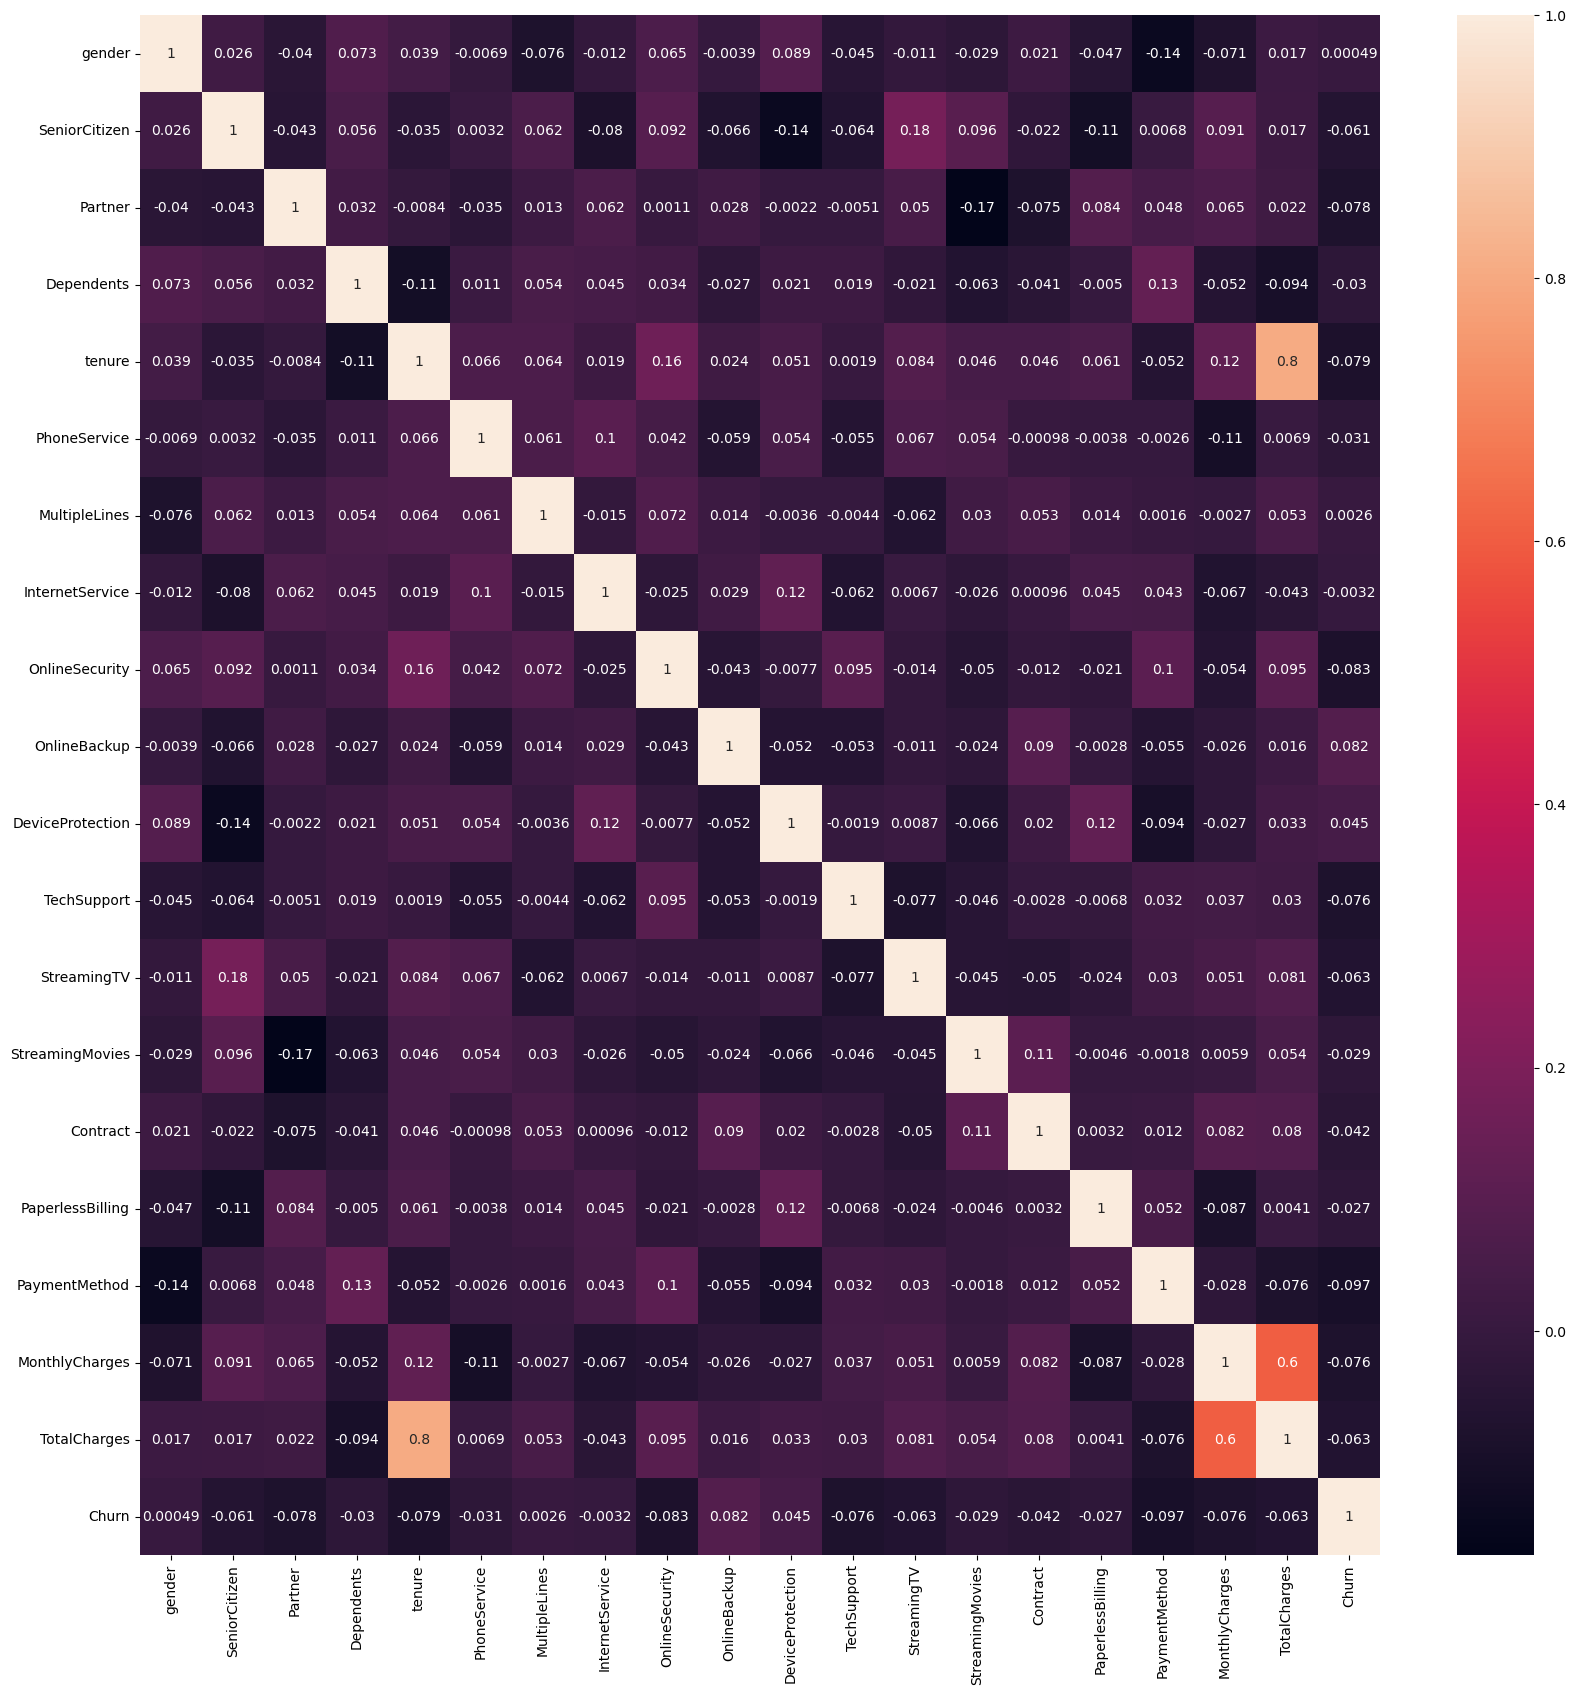

In [10]:
#using seaborn to plot the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [11]:
data['Churn'].value_counts()

Churn
0    161
1    139
Name: count, dtype: int64

In [12]:
#using SelectKBest to select the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop('Churn', axis=1)
y = data['Churn']

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)
X_new = fit.transform(X)


mask = fit.get_support()
new_features1 = X.columns[mask]

new_features1


Index(['SeniorCitizen', 'Partner', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingTV', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [13]:
#using RFECV to select the best features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = data.drop('Churn', axis=1)
y = data['Churn']

model = LinearRegression()
rfecv = RFE(estimator=model, n_features_to_select=10, step=1)
fit = rfecv.fit(X,y)
X_new = fit.transform(X)

mask = fit.support_
new_features2 = X.columns[mask]

new_features2

Index(['SeniorCitizen', 'Partner', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [14]:
#using Lasso to select the best features
from sklearn.linear_model import Lasso

X = data.drop('Churn', axis=1)
y = data['Churn']

model = Lasso(alpha=0.01)
model.fit(X,y)
X_new = model.coef_

mask = X_new != 0
new_features3 = X.columns[mask]

new_features3


Index(['SeniorCitizen', 'Partner', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [15]:
#creating set of best features and graphing with target variable
best_features = set(new_features1) | set(new_features2) | set(new_features3)
best_features = list(best_features)

best_features




['OnlineBackup',
 'MonthlyCharges',
 'PhoneService',
 'tenure',
 'TechSupport',
 'Contract',
 'SeniorCitizen',
 'PaperlessBilling',
 'PaymentMethod',
 'StreamingMovies',
 'Partner',
 'StreamingTV',
 'DeviceProtection',
 'TotalCharges',
 'OnlineSecurity']

In [16]:
from sklearn.ensemble import RandomForestClassifier
correlation_matrix = data.corr(numeric_only=True)
correlation_with_target = correlation_matrix["Churn"].abs()  # Absolute correlation with churn
correlation_threshold = 0.05  # Set a threshold for correlation
selected_features_corr = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()

# Remove 'Churn_numeric' from the selected features
selected_features_corr.remove('Churn')

# Prepare data with correlation-selected features only
X_corr_selected = X[selected_features_corr]  # Only selected features based on correlation

# Recursive Feature Elimination (RFE) with Random Forest
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_corr_selected, y)

# Get the ranking of the features and select the most important ones
rfe_ranking = rfe_selector.ranking_
selected_features_rfe = np.array(X_corr_selected.columns)[rfe_ranking == 1].tolist()

selected_features_corr, selected_features_rfe


(['SeniorCitizen',
  'Partner',
  'tenure',
  'OnlineSecurity',
  'OnlineBackup',
  'TechSupport',
  'StreamingTV',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges'],
 ['SeniorCitizen',
  'Partner',
  'tenure',
  'OnlineSecurity',
  'OnlineBackup',
  'TechSupport',
  'StreamingTV',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges'])

In [31]:
#create pipeline to try the different sets of new features along with cumulative best features for models: Logistic Regression, Random Forest, and Gradient Boosting
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


X = data[selected_features_corr]

y = data['Churn']




In [18]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()),
    ('clf', LogisticRegression())
])

In [44]:
#splitting data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

scores

{'fit_time': array([0.00482678, 0.00242209, 0.00182676, 0.00165987, 0.00220227]),
 'score_time': array([0.00622416, 0.00560379, 0.00482607, 0.00429702, 0.0046339 ]),
 'test_accuracy': array([0.47916667, 0.54166667, 0.64583333, 0.54166667, 0.45833333]),
 'test_precision': array([0.42105263, 0.5       , 0.63636364, 0.52631579, 0.43478261]),
 'test_recall': array([0.36363636, 0.36363636, 0.60869565, 0.43478261, 0.43478261]),
 'test_f1': array([0.3902439 , 0.42105263, 0.62222222, 0.47619048, 0.43478261])}

In [46]:
scores['test_accuracy'].mean(), scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean()

(0.5333333333333333,
 0.503702933222384,
 0.44110671936758894,
 0.4688983682252645)

In [47]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


clfs = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier(), SVC(), KNeighborsClassifier()]

In [48]:

for classifier in clfs:
    pipeline.set_params(clf=classifier)
    scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    print('='*30)
    print(f'{classifier}')
    print(scores)
    for metric in scores.keys():
        print(f'{metric}: {scores[metric].mean()}')
        
    
    print('='*30)
    

LogisticRegression()
{'fit_time': array([0.01241016, 0.00806117, 0.00346899, 0.00202513, 0.00183916]), 'score_time': array([0.02232909, 0.00627303, 0.002913  , 0.00240898, 0.00290895]), 'test_accuracy': array([0.375     , 0.45833333, 0.625     , 0.70833333, 0.58333333]), 'test_precision': array([0.27777778, 0.375     , 0.63157895, 0.69565217, 0.55555556]), 'test_recall': array([0.22727273, 0.27272727, 0.52173913, 0.69565217, 0.65217391]), 'test_f1': array([0.25      , 0.31578947, 0.57142857, 0.69565217, 0.6       ])}
fit_time: 0.005560922622680664
score_time: 0.007366609573364258
test_accuracy: 0.55
test_precision: 0.5071128909229596
test_recall: 0.4739130434782609
test_f1: 0.48657404380516506
RandomForestClassifier()
{'fit_time': array([0.04713607, 0.04553795, 0.04532504, 0.04551101, 0.04729605]), 'score_time': array([0.0042181 , 0.00376821, 0.00416088, 0.00400496, 0.00365782]), 'test_accuracy': array([0.41666667, 0.47916667, 0.54166667, 0.5625    , 0.4375    ]), 'test_precision': arr

trying pipeline with hyperparameter fitting to check accuracy improvements

In [51]:
from sklearn.model_selection import GridSearchCV

In [49]:

param_grids = {
    'LogisticRegression': {
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l2']
    },
    'RandomForestClassifier': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5, 10]
    },
    'GradientBoostingClassifier': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 5, 7]
    },
    'XGBClassifier': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 5, 7]
    },
    'SVC': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    }
}

In [54]:
for classifier in clfs:
    classifier_name = classifier.__class__.__name__
    
    # Set the classifier in the pipeline
    pipeline.set_params(clf=classifier)
    
    # Get the hyperparameter grid for the current classifier
    param_grid = param_grids.get(classifier_name)
    
    # If a hyperparameter grid is defined, perform tuning
    if param_grid:
        search = GridSearchCV(pipeline, param_grid, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'], refit='accuracy', return_train_score=True)
        search.fit(X_train, y_train)
        
        print('=' * 30)
        print(f'Best parameters for {classifier_name}: {search.best_params_}')
        print(f'Best cross-validation accuracy: {search.best_score_}')
        
        # Print the mean scores for each metric
        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            print(f'{metric}: {search.cv_results_["mean_test_" + metric].mean()}')
        
        print('=' * 30)

    else:
        # If no hyperparameter grid, just perform cross-validation
        scores = cross_validate(pipeline, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
        print('=' * 30)
        print(f'{classifier_name}')
        for metric in scores.keys():
            print(f'{metric}: {scores[metric].mean()}')
        print('=' * 30)

Best parameters for LogisticRegression: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Best cross-validation accuracy: 0.5708333333333334
accuracy: 0.553125
precision: 0.5204028359915761
recall: 0.45256916996047436
f1: 0.4790975417986456
Best parameters for RandomForestClassifier: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Best cross-validation accuracy: 0.55
accuracy: 0.5060185185185185
precision: 0.47171318896145525
recall: 0.4440199092373006
f1: 0.4553689527570039
Best parameters for GradientBoostingClassifier: {'clf__learning_rate': 0.1, 'clf__max_depth': 7, 'clf__n_estimators': 50}
Best cross-validation accuracy: 0.5541666666666666
accuracy: 0.518827160493827
precision: 0.48720627399320227
recall: 0.45573122529644267
f1: 0.46764831636691795
Best parameters for XGBClassifier: {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__n_estimators': 50}
Best cross-validation accuracy: 0.5625
accuracy: 0.513425925925926
precision: 0.4811649829711141
recall: 0

/Users/aaditnagori/anaconda3/envs/alldigital/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aaditnagori/anaconda3/envs/alldigital/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aaditnagori/anaconda3/envs/alldigital/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Best parameters for SVC: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best cross-validation accuracy: 0.5666666666666667
accuracy: 0.5333333333333333
precision: 0.4138822180276727
recall: 0.3664690382081686
f1: 0.38579127448905054
Best parameters for KNeighborsClassifier: {'clf__n_neighbors': 9, 'clf__weights': 'distance'}
Best cross-validation accuracy: 0.575
accuracy: 0.5286458333333334
precision: 0.49996486353689135
recall: 0.4205533596837945
f1: 0.4534745936106239


Logistical Regression Seems to have the best Accuracy Scores (0.55) hence i will be using that